In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [54]:
class PolynomialRegression:
    def __init__(self, degrees, n_iters=1000, lr=0.01):
        self.degrees = degrees
        self.n_iters = n_iters
        self.lr = lr
        self.weights = None
        self.bias = None
        self.losses = None
        
    #Calculate the R2 score    
    def r2_score(self, y, y_pred):
        mean_y = np.mean(y)
        ss_total = np.sum((y - mean_y)**2)
        ss_residual = np.sum((y - y_pred)**2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    #Calculate the loss function    
    def loss(self, y, y_pred):
        return np.mean((y_pred - y)**2)
    
    #Calculate Gradients (2* is adjusted in the learning rate parameter)
    def gradients(self, X, y, y_pred):
        n_samples, n_features = X.shape
        dw = (1/n_samples)*np.dot(X.T, (y_pred - y))
        db = (1/n_samples)*np.sum(y_pred - y)
        return dw, db
    
    #Copy the values from X to t and as per the degree provided in the list find it exponent
    #example: degree=[3] then X -> X^2 -> X^3
    def x_transform(self, X):
        t = X.copy()
        for i in self.degrees:
            X = np.append(X, t**i, axis=1)
        return X
    
    
    #Fit the Model
    def fit(self, X, y):
        x = self.x_transform(X)
        n_samples, n_features = x.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        y = y.reshape(n_samples, 1)
        self.losses = []

        for _ in range(self.n_iters):
            y_pred = np.dot(x, self.weights) + self.bias
            
            dw = (1/n_samples)*np.dot(x.T, (y_pred - y))
            db = (1/n_samples)*np.sum(y_pred - y)
            
            #Update the weights and bias
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            
            #calculate and Store the loss in a empty list
            l = self.loss(y, y_pred)
            self.losses.append(l)
            print('Iteration',_,'Loss:',l)

    def predict(self, X):
        x1 = self.x_transform(X)
        y_pred = np.dot(x1, self.weights) + self.bias
        return y_pred

### Initialize the Sample Data

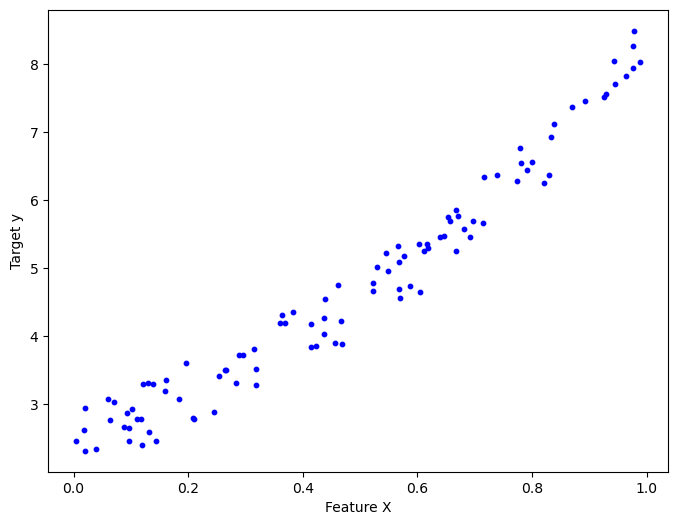

In [55]:
np.random.seed(0)
X = np.random.rand(100,1)
y = 2 * (4 ** X) + np.random.rand(100,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color="blue", s = 10, label='Data Points')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.show()

### Fitting the model

In [56]:
model = PolynomialRegression(degrees=[2], lr=0.01, n_iters=10000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Iteration 0 Loss: 25.70638552207037
Iteration 1 Loss: 25.012642372009775
Iteration 2 Loss: 24.337987594586007
Iteration 3 Loss: 23.681895244238806
Iteration 4 Loss: 23.043853868563463
Iteration 5 Loss: 22.423366108928093
Iteration 6 Loss: 21.819948312096535
Iteration 7 Loss: 21.233130152553617
Iteration 8 Loss: 20.662454265237898
Iteration 9 Loss: 20.10747588839506
Iteration 10 Loss: 19.567762516273095
Iteration 11 Loss: 19.042893561388006
Iteration 12 Loss: 18.532460026096388
Iteration 13 Loss: 18.036064183218365
Iteration 14 Loss: 17.55331926546146
Iteration 15 Loss: 17.083849163402977
Iteration 16 Loss: 16.62728813179488
Iteration 17 Loss: 16.183280503962052
Iteration 18 Loss: 15.75148041407068
Iteration 19 Loss: 15.33155152705007
Iteration 20 Loss: 14.923166775956863
Iteration 21 Loss: 14.526008106576683
Iteration 22 Loss: 14.139766229063621
Iteration 23 Loss: 13.764140376423825
Iteration 24 Loss: 13.39883806965434
Iteration 25 Loss: 13.043574889354076
Iteration 26 Loss: 12.6980742

### Find The Mean Squared Error to check how good our model is performing

In [57]:
def mse(y_test, predictions):
        return np.mean((y_test - predictions)**2)

mse = mse(y_test, predictions)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.08273212786237422


**This model is preforming well as the MSE value is closer to 0**

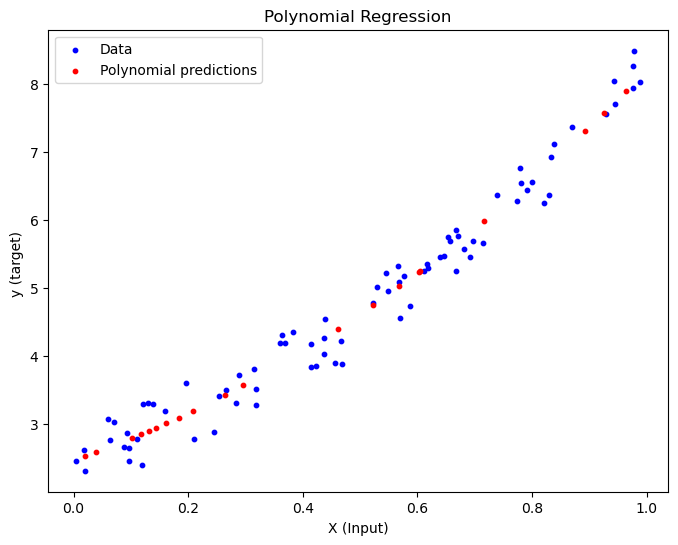

In [58]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', marker='o', s = 10)
plt.scatter(X_test, predictions, color='red', marker='o', s = 10)
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X (Input)')
plt.ylabel('y (target) ')
plt.title('Polynomial Regression')
plt.show()

### Calculate R2 Score to check how good is our fitting the data?

In [60]:
r2 = model.r2_score(y_test, predictions)
print(f'R2 Score: {r2}')

R2 Score: 0.9726705321657484


**An R2 score of 0.97 indicates that 97% of the variance in our dependent variable is explained by our independent variables**